<a href="https://colab.research.google.com/github/lucasagostinhok/Prova_Data_Science_N1.ipynb/blob/main/Prova_Data_Science_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [27]:
# Instalação de bibliotecas básicas
!pip install pandas numpy matplotlib seaborn requests plotly
!pip install plotly



## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [72]:
# Responda aqui a primeira etapa
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1CeLurGcydVGUifw3U-K0XEd5h3ZniQfR'

df = pd.read_csv(url)

df.head()


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

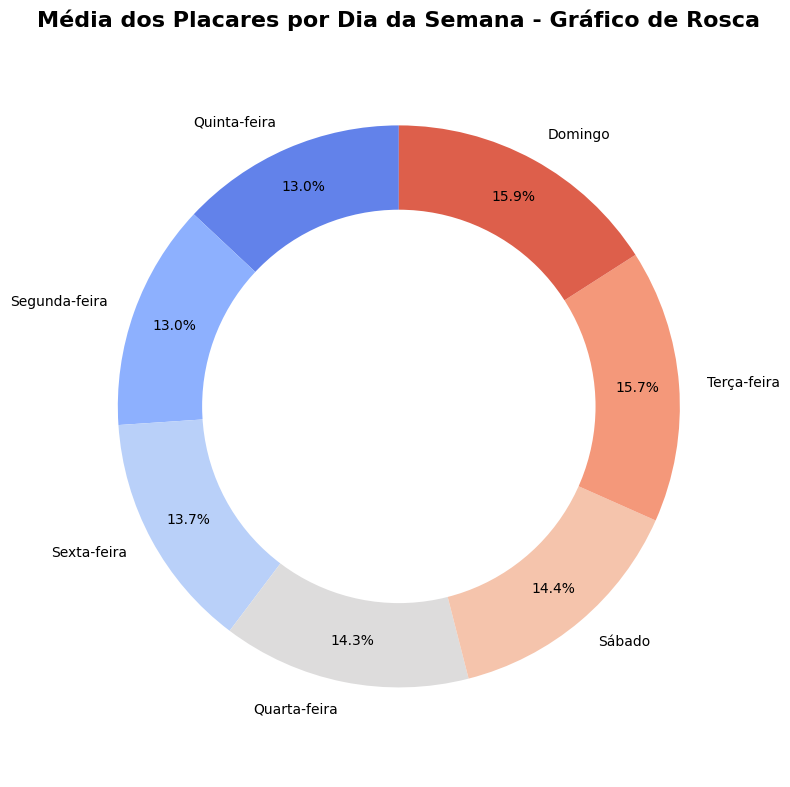

In [73]:
#Gráfico de Rosca
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    media_placares_pt.values,
    labels=media_placares_pt.index,
    autopct='%1.1f%%',
    pctdistance=0.85,
    colors=sns.color_palette("coolwarm", len(media_placares_pt)),
    startangle=90
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.title('Média dos Placares por Dia da Semana - Gráfico de Rosca', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

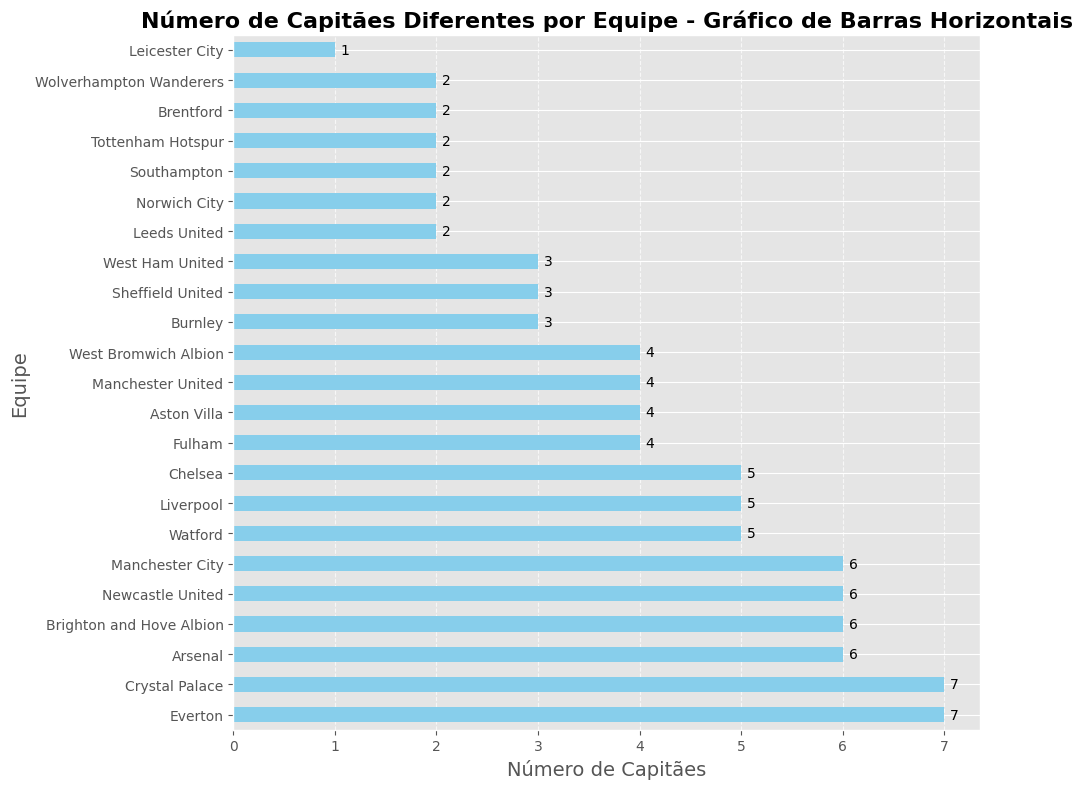

In [74]:
# Gráfico de Barras Horizontais
capitaes_por_equipe = df.groupby('team')['captain'].nunique().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
capitaes_por_equipe.plot(kind='barh', color='skyblue', ax=ax)

ax.set_title('Número de Capitães Diferentes por Equipe - Gráfico de Barras Horizontais', fontsize=16, fontweight='bold')
ax.set_xlabel('Número de Capitães', fontsize=14)
ax.set_ylabel('Equipe', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height() / 2, f'{i.get_width():.0f}', ha='center', va='center')

plt.tight_layout()
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

In [94]:
df['result'] = df['result'].replace({
    'W': 'Vitória',
    'D': 'Empate',
    'L': 'Derrota'
})

formacao_por_resultado = df.groupby(['team', 'result', 'formation']).size().reset_index(name='count')

mais_comum = formacao_por_resultado.loc[formacao_por_resultado.groupby(['team', 'result'])['count'].idxmax()]

fig = px.bar(mais_comum,
             x='team',
             y='count',
             color='result',
             hover_data=['formation'],  # Adiciona a formação mais comum na tooltip
             title='Formação Tática mais Comum por Equipe e Resultado')

fig.update_layout(
    xaxis_title="Equipe",
    yaxis_title="Contagem de Ocorrências",
    hovermode="closest",
    height=600,
    bargap=0.2,
    xaxis_tickangle=-45,
)

fig.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

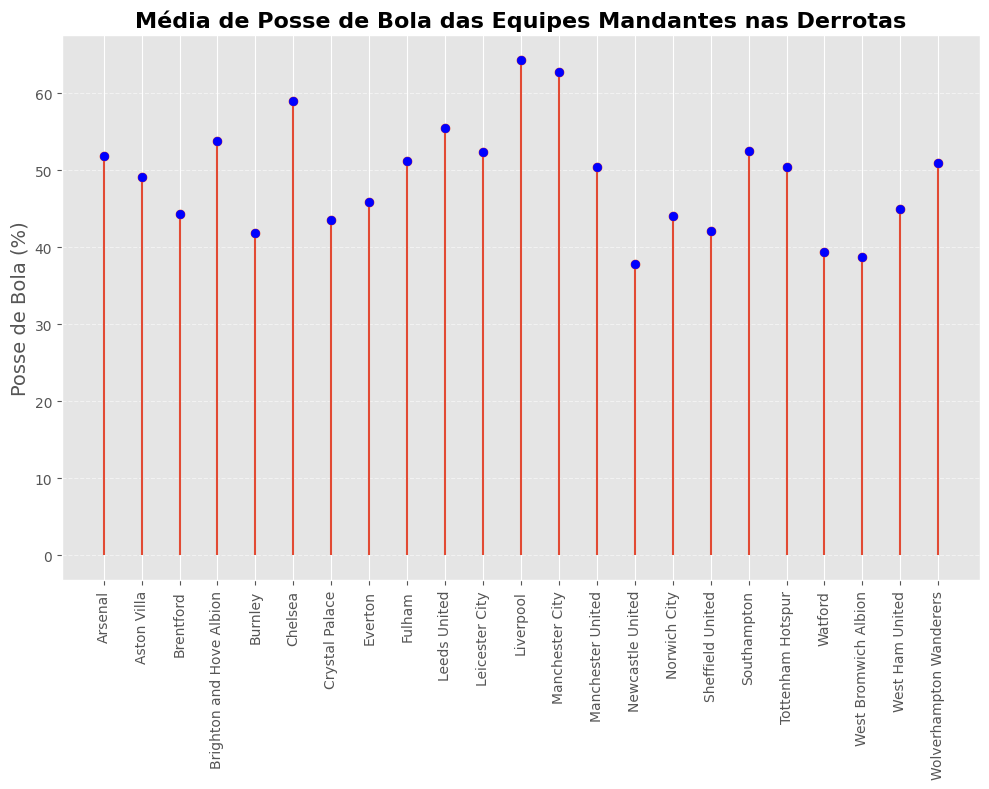

In [76]:
# Gráfico Lollipop
plt.figure(figsize=(10, 8))

plt.stem(media_posse_bola.index, media_posse_bola.values, basefmt=" ")

plt.scatter(media_posse_bola.index, media_posse_bola.values, color='blue', zorder=5)

plt.title('Média de Posse de Bola das Equipes Mandantes nas Derrotas', fontsize=16, fontweight='bold')
plt.ylabel('Posse de Bola (%)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()




## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [77]:
import pandas as pd
from IPython.display import HTML

df['team'] = df['team'].str.strip()

def gerar_url_brasao(team_name):
    formatted_name = team_name.lower().replace(" ", "-") + "-football-club"
    return f"https://logodetimes.com/times/{formatted_name}/{formatted_name}-256.png"

classificacao['Brasão'] = classificacao['team'].apply(gerar_url_brasao)

urls_manualmente = {
    'Fulham': 'https://upload.wikimedia.org/wikipedia/pt/thumb/1/13/Fulham_FC.svg/340px-Fulham_FC.svg.png?20100907170132',
    'West Bromwich Albion': 'https://upload.wikimedia.org/wikipedia/pt/thumb/b/b1/West_Bromwich_Albion.png/120px-West_Bromwich_Albion.png',
    'Sheffield United': 'https://upload.wikimedia.org/wikipedia/pt/4/49/Sheffield_United_FC.png',
    'Brighton and Hove Albion': 'https://upload.wikimedia.org/wikipedia/pt/3/3f/Brighton_%26_Hove_Albion.png'
}

classificacao['Brasão'] = classificacao.apply(
    lambda row: urls_manualmente.get(row['team'], row['Brasão']),
    axis=1
)

def display_with_logos(df):
    html = """
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: center;
        }
        th {
            background-color: #f4f4f4;
            color: #333;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        img {
            width: 50px;
            height: auto;
        }
    </style>
    <table>
        <tr>
            <th>Posição</th>
            <th>Brasão</th>
            <th>Equipe</th>
            <th>Pontos</th>
        </tr>"""
    for i, row in df.iterrows():
        img = row['Brasão'] if pd.notnull(row['Brasão']) else "https://via.placeholder.com/50"
        html += f"""
        <tr>
            <td>{row['Posição']}</td>
            <td><img src='{img}'></td>
            <td>{row['team']}</td>
            <td>{row['pontos']}</td>
        </tr>"""
    html += "</table>"
    return HTML(html)

display_with_logos(classificacao)


Posição,Brasão,Equipe,Pontos
1,,Manchester City,166
2,,Chelsea,132
3,,Manchester United,128
4,,Arsenal,121
5,,Tottenham Hotspur,120
6,,West Ham United,117
7,,Leicester City,108
8,,Wolverhampton Wanderers,94
9,,Leeds United,93
10,,Aston Villa,92


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [78]:
import plotly.express as px
import pandas as pd

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

publico_total_por_equipe = df.groupby('team')['attendance'].sum().reset_index()

fig_total = px.bar(publico_total_por_equipe,
             x='team',
             y='attendance',
             title='Público Total por Equipe',
             labels={'team': 'Equipe', 'attendance': 'Público Total'},
             hover_data=['attendance'])

fig_total.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Equipe",
    yaxis_title="Público Total",
    margin=dict(l=40, r=40, t=40, b=120),
    height=600
)

fig_total.show()

def show_detalhamento(equipe_selecionada):
    jogos_da_equipe = df[df['team'] == equipe_selecionada]

    fig_detalhe = px.scatter(jogos_da_equipe,
                             x='date',
                             y='attendance',
                             title=f'Detalhamento de Público por Jogo - {equipe_selecionada}',
                             labels={'date': 'Data', 'attendance': 'Público por Jogo'},
                             hover_data=['attendance'])

    fig_detalhe.update_traces(marker=dict(size=12, color='blue', opacity=0.7))

    fig_detalhe.update_layout(
        xaxis_title="Data",
        yaxis_title="Público por Jogo",
        xaxis=dict(tickformat="%b %Y", tickangle=-45),
        margin=dict(l=40, r=40, t=40, b=80),
        height=600,
        plot_bgcolor='#f2f2f2',
        paper_bgcolor='#e6e6e6',
        showlegend=False
    )

    fig_detalhe.show()

equipe_selecionada = input("Digite o nome de uma equipe da Premier League para ver o detalhamento de público: ")

show_detalhamento(equipe_selecionada)


Digite o nome de uma equipe da Premier League para ver o detalhamento de público: Arsenal
